# This file contains hiring statics for a firm such as experience of candidate,
his written test score and personal interview score. Based on these 3 factors,
HR will decide the salary. Given this data, you need to build a machine learning model 
for HR department that can help them decide salaries for future candidates. 
Using this predict salaries for following candidates,

3 yr experience, 10 test score, 7 interview score

15 yr experience, 8 test score, 11 interview score

After that make a 3D plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [2]:
df= pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
#filling nan values by zero
df['experience'].fillna('zero', inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
#Converting words (zero) to numbers (0)
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [5]:
import math
mean_test_score= math.floor(df['test_score(out of 10)'].mean())
mean_test_score


7

In [6]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [7]:
reg= linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [14]:
reg.predict([[3,10,7]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61004.92745222])

In [10]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [11]:
reg.intercept_

14992.65144669314

In [13]:
reg.predict([[15,8,11]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([100219.46769876])

# plotting

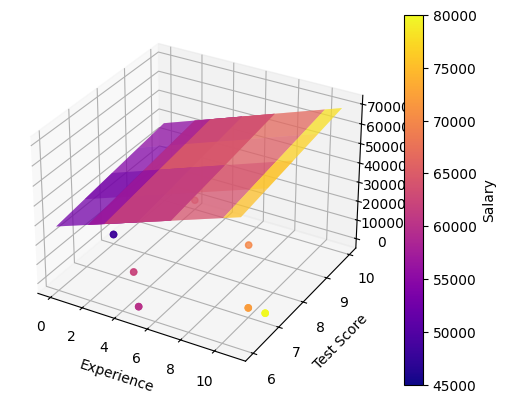

In [22]:

experience = df['experience']
test_score = df['test_score(out of 10)']
interview_score = df['interview_score(out of 10)']
salary = df['salary($)']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(experience, test_score, interview_score, c=salary, cmap='plasma')

# Set labels for the axes
ax.set_xlabel('Experience')
ax.set_ylabel('Test Score')
ax.set_zlabel('Interview Score')

# Add a color bar to show salary values
cbar = plt.colorbar(ax.scatter(experience, test_score, interview_score, c=salary, cmap='plasma'))
cbar.set_label('Salary')

# Create a grid of values for the three variables
x_grid, y_grid = np.meshgrid(experience, test_score)
z_grid = reg.coef_[0] * x_grid + reg.coef_[1] * y_grid + reg.intercept_

# Plot the linear regression planeplasma
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='plasma')


# Show the 3D scatter plot with the regression plane
plt.show()